##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic regression: Predict fuel efficiency

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras [tutorials](https://www.tensorflow.org/tutorials/keras) and [guides](https://www.tensorflow.org/guide/keras) to learn more.)

In [3]:
# Do not change anything in this code block (MEEM 5990 Project 5)

# Use seaborn for pairplot.
!pip install -q seaborn

In [4]:
# Do not change anything in this code block (MEEM 5990 Project 5)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

tf.random.set_seed(1) # Setting seed for rng. Do no change the seed.

## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


### Get the data
First download and import the dataset using pandas:

In [5]:
# Do not change anything in this code block (MEEM 5990 Project 5)

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
# Do not change anything in this code block (MEEM 5990 Project 5)

dataset = raw_dataset.copy()
dataset.tail() # Printing last few rows of the data set. First column is output 
# and 2nd column onwards are inputs

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the data

The dataset might contains a few unknown values, we will dron those rows:

In [7]:
# Do not change anything in this code block (MEEM 5990 Project 5)

dataset.isna().sum()
dataset = dataset.dropna()

The `"Origin"` column is categorical, not numeric. So the next step is to one-hot encode the values in the column with [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note: You can set up the `tf.keras.Model` to do this kind of transformation for you but that's beyond the scope of this tutorial. Check out the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) or [Load CSV data](../load_data/csv.ipynb) tutorials for examples.

In [8]:
# Do not change anything in this code block (MEEM 5990 Project 5)
# Read about one hot encoding and where it is used. Describe it in brief in your project report. (MEEM 5990 Project 5) 

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
# Do not change anything in this code block (MEEM 5990 Project 5)

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail() # Notice that the country is now one hot encoded

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [10]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_dataset = dataset.sample(frac=0.8, random_state=0) # frac indicates fraction of training data
test_dataset = dataset.drop(train_dataset.index)
print(np.size(train_dataset))
print(np.size(test_dataset))

3140
780


### Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [11]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG') # setting MPG column as labels, and at the same time popping (deleting) it from the features
test_labels = test_features.pop('MPG')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

In [12]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [13]:
# Do not change anything in this code block (MEEM 5990 Project 5)
# Read about normalization of input features and why it is important. Describe it in brief in your project report. (MEEM 5990 Project 5) 

normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`:

In [14]:
# Do not change anything in this code block (MEEM 5990 Project 5)

normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer:

In [15]:
# Do not change anything in this code block (MEEM 5990 Project 5)

print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [16]:
# Do not change anything in this code block (MEEM 5990 Project 5)

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [17]:
# You can change upper lim of y axis ticks. Currently it is set to 10. 

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  yuplim1 = np.max(np.max(history.history['val_loss']))
  yuplim2 = np.max(np.max(history.history['loss']))
  plt.ylim([0, max(yuplim1,yuplim2) ])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

## Regression with a deep neural network (DNN)

In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

Both models will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [18]:
# This block is the neural network architecture. 
# You can change the number of layers, number of neurons, and activation function for the layers.
# You can also change the loss function to mean squared error

# activation functions can be found at https://www.tensorflow.org/api_docs/python/tf/keras/activations
# Generally same activation function is used for all layers except for the last layer where we do not have a activation now
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(96, activation='sigmoid'), # 64 denotes number of neurons in this layer
      layers.Dense(32, activation='tanh'),
      layers.Dense(16, activation='swish'),
      layers.Dense(16, activation='relu'), 
      layers.Dense(1) # Do not add activation here, Do not change number of neurons, there is no activation here as it is a regression problem
  ])

  # to change loss function to mean squared error use tf.keras.losses.MeanSquaredError()
  # Other loss functions are found at https://www.tensorflow.org/api_docs/python/tf/keras/losses
  model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(0.001))

  return model

### Regression using a DNN and multiple inputs

In [19]:
# Do not change anything in this code block (MEEM 5990 Project 5)
# Note down the number of trainable parameters. Need to be written in project report
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 96)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [20]:
# history stores the loss or error at each epoch.
# In this code block you can change the number of epochs as necessary
# Verbose can take values 0 or 1. It des not affect the performance of the model. Try changing the value to 1.
# validation split is 20%. That means 20% of the training data is used to check the performance of the model during training phase.

start = time.time() # starting stopwatch
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100) # you can change the number of epochs
end = time.time() # ending stopwatch
print('Time required to train: Training time = '+ str(np.round(end - start,4)) + ' seconds')

Epoch 1/10
8/8 [==============================] - 1s 56ms/step - loss: 23.0618 - val_loss: 23.3513
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 22.6510 - val_loss: 22.9480
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 22.1808 - val_loss: 22.3556
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 21.5045 - val_loss: 21.5913
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 20.6867 - val_loss: 20.6988
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 19.7286 - val_loss: 19.6481
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 18.6096 - val_loss: 18.4524
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 17.3518 - val_loss: 17.0594
Epoch 9/10
8/8 [==============================] - 0s 11ms/step - loss: 15.8161 - val_loss: 15.3502
Epoch 10/10
8/8 [==============================] - 0s 10ms/step - loss: 13.9877 - val_loss: 13.3636
Time required

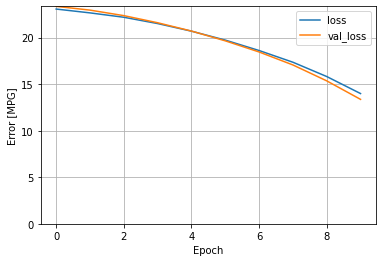

In [21]:
# Here we are plotting loss vs epochs. You need to retrieve this plot for your project report.

plot_loss(history)

## Performance

### Make predictions

You can now make predictions with the `dnn_model` on the test set using Keras `Model.predict` and review the loss:

Correlation coefficient: R = 0.0985


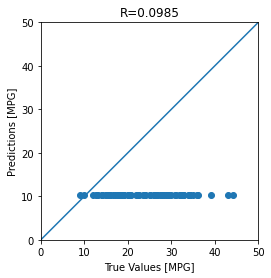

In [22]:
test_predictions = dnn_model.predict(test_features).flatten() # predicitng for test data

# Here we are finding pearson correlation coefficient. 
# Read where the pearson correlation coefficient is used in Machine Learning.
# Write in brief about pearson correlation coefficient in your report.

corr = np.corrcoef(test_labels, test_predictions)
corr = np.round(corr[0,1],4) # You can change the number of decimals if you want. Currently it is set to 4. 
print('Correlation coefficient: R = '+str(corr))  # You have to report his value in your project report

# Now we plot the correlation
# You need to retrieve this plot for your project report.
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.title('R='+str(corr))
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It appears that the model predicts reasonably well.

Now, check the error distribution:

Mean squared error for test data: Error = 250.724


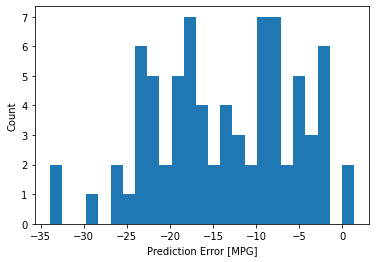

In [23]:
error = test_predictions - test_labels
# Plotting error histogram 
# No need to retrieve this plot for the project report
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# calculating mean squared error for test data
test_data_mse = np.round(np.mean((test_predictions - test_labels)**2),4)
print('Mean squared error for test data: Error = '+ str(test_data_mse)) # You have to report his value in your project report

If you're happy with the model, save it for later use with `Model.save`:

In [24]:
# You can save the model if you want. However it is not a deliverable for this project 
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


## Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

- Mean squared error (MSE) (`tf.keras.losses.MeanSquaredError`) and mean absolute error (MAE) (`tf.keras.losses.MeanAbsoluteError`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
- Similarly, evaluation metrics used for regression differ from classification.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
- Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. Visit the [Overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.